In [1]:
from mot_analysis.motimg import MOTImaging
# blue mot tof flight measurement
import os
import glob
import h5py
import json
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [4]:
## WINDOWS: On your .ipynb, import this plotting_style by adding in and uncommenting the following lines:
# import matplotlib.pyplot as plt
# import sys
# sys.path.append('C:/Users/Michael/Dropbox/AION/Projects')  # Replace with the relevant path that contains this script
# from plotting_style_arial import set_plotting_style_arial
# set_plotting_style_arial()

## MAC: On your .ipynb, import this plotting_style by adding in and uncommenting the following lines:
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/michael/Dropbox/AION/Projects')  # Replace with the relevant path that contains this script
from plotting_style_arial import set_plotting_style_arial
set_plotting_style_arial()


import matplotlib.pyplot as plt

print('Initialising arial plotting style...')

def set_plotting_style_arial():
    plt.rc("font", family = 'Arial', size=10)
    plt.rc('axes', labelsize=20, titlesize = 20, labelpad=5)
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=18)
    plt.rc('legend', fontsize=15)

print('Success! Arial plotting style initialised.')

Initialising arial plotting style...
Success! Arial plotting style initialised.
Initialising arial plotting style...
Success! Arial plotting style initialised.


In [42]:
# copy paste this code to the beginning of your script to set the plotting style for a one column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "figure.constrained_layout.use": True
})

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,2.5)  # (width, height) in inches, change height but not width
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "best" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size
plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
plt.rcParams["lines.markerfacecolor"] = "dodgerblue" # color of the inside of the marker
plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
plt.rcParams["lines.color"] = "black" # color of the line
# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","indianred","mediumpurple","slateblue","darkorange","peru","goldenrod"

plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7

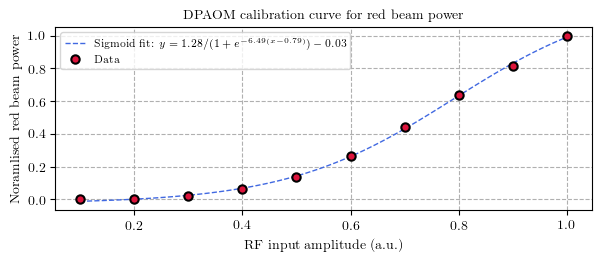

In [143]:
from scipy.optimize import curve_fit

amp = [1,0.9,0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
efficiency = [1, 0.815, 0.637, 0.441, 0.266, 0.136, 0.062, 0.022,0,0]

# fit the data with a sigmoid function for an acoustic optic modulator
def sigmoid_func(x, a, b, c, d):
    return a / (1 + np.exp(-b * (x - c))) + d

weights = np.ones_like(efficiency)
weights[:-5] = 0.1  # Give more weight to data points

popt_sigmoid, pcov_sigmoid = curve_fit(sigmoid_func, amp, efficiency)

# Plot the fitted sigmoid curve
x_fit_sigmoid = np.linspace(min(amp), max(amp), 100)
y_fit_sigmoid = sigmoid_func(x_fit_sigmoid, *popt_sigmoid)

plt.plot(x_fit_sigmoid, y_fit_sigmoid, '--', color='royalblue', label = r"Sigmoid fit: $y = 1.28/(1 + e^{-6.49(x - 0.79)}) - 0.03$")
plt.plot(amp, efficiency, 'ko', label = 'Data')
plt.legend()
plt.xlabel('RF input amplitude (a.u.)')
plt.ylabel('Noramlised red beam power')
plt.title('DPAOM calibration curve for red beam power')

plt.savefig('250427 DPAOMCalibrationCurveRedBeamPower.pdf', dpi=300)

# Import and quick plot

# ONE COLUMN LATEX FONT FOR THESIS 2025/04/26

In [101]:
# copy paste this code to the beginning of your script to set the plotting style for a one column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "figure.constrained_layout.use": True
})

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,2.5)  # (width, height) in inches, change height but not width
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "best" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size
plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
plt.rcParams["lines.markerfacecolor"] = "dodgerblue" # color of the inside of the marker
plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
plt.rcParams["lines.color"] = "black" # color of the line
# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","indianred","mediumpurple","slateblue","darkorange","peru","goldenrod"

plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7

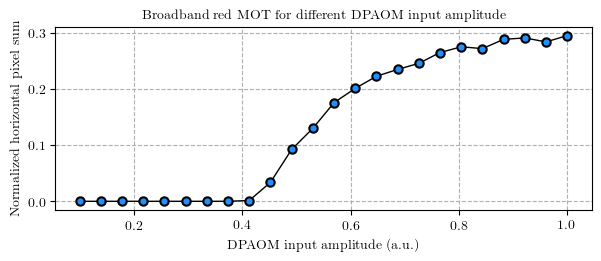

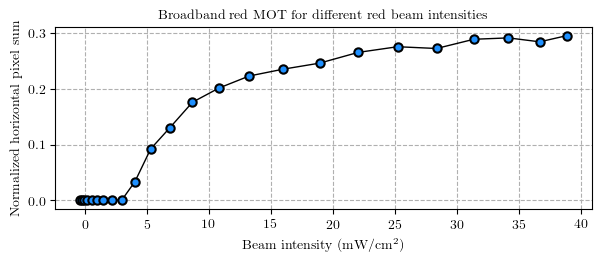

In [73]:
file_path = r"000016618-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_16618.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_16618.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

plt.figure()
plt.plot(x_data, y_data/10,'ko-')
plt.xlabel('DPAOM input amplitude (a.u.)')
plt.ylabel('Normalized horizontal pixel sum')
plt.title('Broadband red MOT for different DPAOM input amplitude')
# plt.legend(loc='upper left')
# plt.grid(True)
plt.savefig('Broadband red MOT for different DPAOM input amplitude.pdf', dpi=300)

# convert the DPAOM amplitude to beam intensity and plot as second x-axis
beam_power = sigmoid_func(x_data, *popt_sigmoid) * 20.73
beam_intensity = 2*beam_power/(np.pi*0.58**2)
plt.figure()
plt.plot(beam_intensity, y_data/10,'ko-')
plt.xlabel(r'Beam intensity (mW/cm$^2$)')
plt.ylabel('Normalized horizontal pixel sum')
plt.title('Broadband red MOT for different red beam intensities')
# plt.legend(loc='upper left')
plt.grid(True)

# plt.tight_layout()
# plt.savefig('Broadband red MOT for different red beam intensities.pdf', dpi=300)

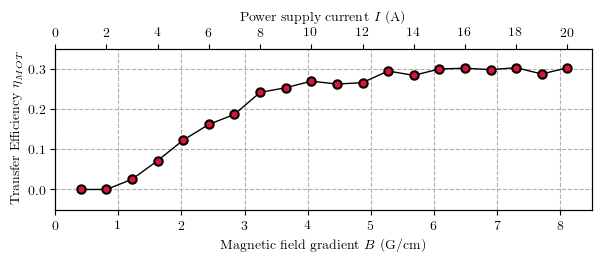

In [139]:
file_path = r"000016620-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_16620.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_16620.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

magnetic_field = [i*0.388 for i in x_data]
plt.plot(magnetic_field, y_data/10, alpha=0)
plt.ylabel(r'Transfer Efficiency $\eta_{MOT}$')
plt.xlabel('Magnetic field gradient $B$ (G/cm)')
plt.xticks((np.linspace(0, 8, 9)))
plt.xlim(0, 8.5)

ax2 = plt.twiny()
ax2.plot(x_data, y_data/10,'ko-')
ax2.set_xlabel('Power supply current $I$ (A)',labelpad=5)
ax2.set_xticks((np.linspace(0, 20, 11)))
ax2.grid(False,which='both')
ax2.set_ylim(-0.05,0.35)

# plt.title('Broadband red MOT for different magnetic fields or currents')

plt.savefig('250427 Broadband red MOT for different magnetic fields.pdf', dpi=300)

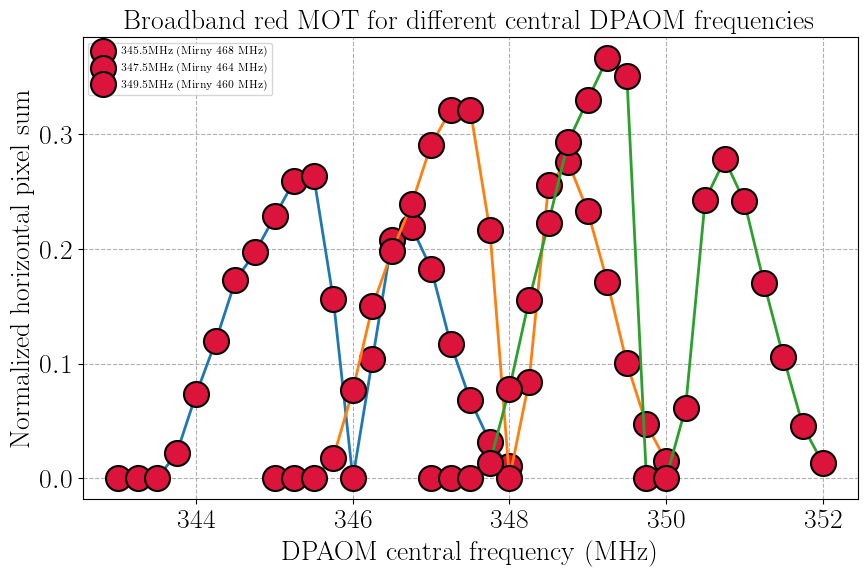

In [79]:
file_path = r"000016609-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data_3495 = h5file['datasets/ndscan.rid_16609.points.axis_0'][:]
    y_data_3495 = h5file['datasets/ndscan.rid_16609.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

file_path = r"000016612-MeasureRedMOT.h5"
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data_3475 = h5file['datasets/ndscan.rid_16612.points.axis_0'][:]
    y_data_3475 = h5file['datasets/ndscan.rid_16612.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

file_path = r"000016614-MeasureRedMOT.h5"
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data_3455 = h5file['datasets/ndscan.rid_16614.points.axis_0'][:]
    y_data_3455 = h5file['datasets/ndscan.rid_16614.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

plt.figure(figsize=(10, 6))
plt.plot(x_data_3455/1e6, y_data_3455/10,'o-', markersize=18, linewidth=2, label='345.5MHz (Mirny 468 MHz)')
plt.plot(x_data_3475/1e6, y_data_3475/10,'o-', markersize=18, linewidth=2, label='347.5MHz (Mirny 464 MHz)')
plt.plot(x_data_3495/1e6, y_data_3495/10,'o-', markersize=18, linewidth=2, label='349.5MHz (Mirny 460 MHz)')
plt.xlabel('DPAOM central frequency (MHz)',fontsize=20)
plt.ylabel('Normalized horizontal pixel sum',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Broadband red MOT for different central DPAOM frequencies',fontsize=20)
plt.legend(loc='upper left')
plt.grid(True)
# plt.tight_layout()
# plt.savefig('Broadband red MOT for different central DPAOM frequencies separate.pdf', dpi=1200)

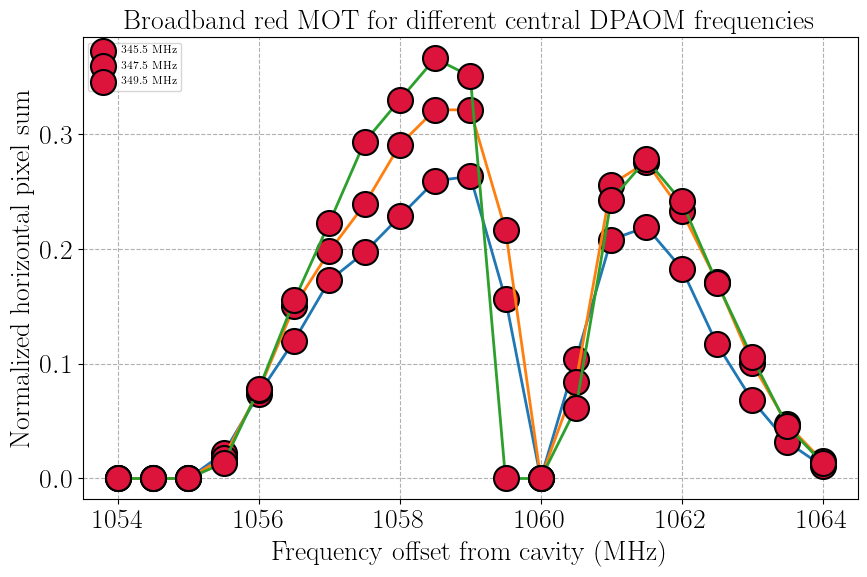

In [80]:
frequencyoffsetfromcavity = np.linspace(1054, 1064, 21)

plt.figure(figsize=(10, 6))
plt.plot(frequencyoffsetfromcavity, y_data_3455/10,'o-', markersize=18, linewidth=2, label='345.5 MHz')
plt.plot(frequencyoffsetfromcavity, y_data_3475/10,'o-', markersize=18, linewidth=2, label='347.5 MHz')
plt.plot(frequencyoffsetfromcavity, y_data_3495/10,'o-', markersize=18, linewidth=2, label='349.5 MHz')
plt.xlabel('Frequency offset from cavity (MHz)',fontsize=20)
plt.ylabel('Normalized horizontal pixel sum',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Broadband red MOT for different central DPAOM frequencies',fontsize=20)
plt.legend(loc='upper left')
plt.grid(True)
# plt.tight_layout()
# plt.savefig('Broadband red MOT for different central DPAOM frequencies combined.pdf', dpi=1200)

# 2025/05/01 TWO COLUMN LATEX FONT FOR ABOVE PLOT ON THESIS

In [81]:
# copy paste this code to the beginning of your script to set the plotting style for a two column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    # "figure.constrained_layout.use": True
})

plt.rcParams["figure.autolayout"] = False # set to True if you want to use constrained_layout

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,2.75)
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "upper left" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size
plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
plt.rcParams["lines.markerfacecolor"] = "crimson" # color of the inside of the marker
plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
plt.rcParams["lines.color"] = "black" # color of the line
# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","indianred","mediumpurple","slateblue","darkorange","peru","goldenrod"

plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7





# plot two figures side by side
# fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, constrained_layout=True)
# plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2) # remove unnecessary white space how i like it, this is manual very of use constrained_layout

# That warning is because matplotlib’s default layout engine has changed in recent
# versions to use constrained_layout, which is incompatible with subplots_adjust and tight_layout. 
# If you try to use plt.subplots_adjust when constrained_layout=True, matplotlib will raise that warning and ignore the call.
# If you're manually adjusting spacing, disable constrained_layout when you create the figure:

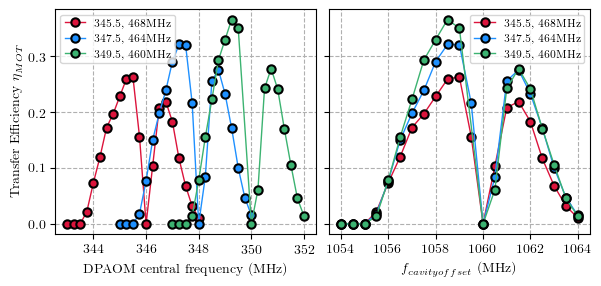

In [82]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, constrained_layout=True)

x_data_3495 = np.delete(x_data_3495, 11)
y_data_3495 = np.delete(y_data_3495, 11)

ax1.plot(x_data_3455/1e6, y_data_3455/10,'o-',color='crimson',markerfacecolor='crimson',label='345.5, 468MHz') #(Mirny 468 MHz)
ax1.plot(x_data_3475/1e6, y_data_3475/10,'o-',color='dodgerblue',markerfacecolor='dodgerblue',label='347.5, 464MHz') #(Mirny 464 MHz)
ax1.plot(x_data_3495/1e6, y_data_3495/10,'o-',color='mediumseagreen',markerfacecolor='mediumseagreen',label='349.5, 460MHz') #(Mirny 460 MHz)
ax1.set_xlabel('DPAOM central frequency (MHz)')
ax1.set_ylabel(r'Transfer Efficiency $\eta_{MOT}$')
ax1.legend(loc='upper left')

ax2.plot(frequencyoffsetfromcavity, y_data_3455/10,'o-',color='crimson',markerfacecolor='crimson', label='345.5, 468MHz')
ax2.plot(frequencyoffsetfromcavity, y_data_3475/10,'o-', color='dodgerblue',markerfacecolor='dodgerblue', label='347.5, 464MHz')

frequencyoffsetfromcavity = np.delete(frequencyoffsetfromcavity, 11)

ax2.plot(frequencyoffsetfromcavity, y_data_3495/10,'o-',color='mediumseagreen',markerfacecolor='mediumseagreen', label='349.5, 460MHz')
ax2.set_xlabel(r'$f_{cavityoffset}$ (MHz)')
ax2.legend(loc='upper right')

plt.savefig("250501 Broadband red MOT for different central DPAOM frequencies.pdf", dpi=300)

# TWO COLUMN LATEX FONT FOR THESIS 2025/04/26

In [137]:
# copy paste this code to the beginning of your script to set the plotting style for a two column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    # "figure.constrained_layout.use": True
})

plt.rcParams["figure.autolayout"] = False # set to True if you want to use constrained_layout

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,2.5)
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "upper left" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size
plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
plt.rcParams["lines.markerfacecolor"] = "crimson" # color of the inside of the marker
plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
plt.rcParams["lines.color"] = "black" # color of the line
# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","indianred","mediumpurple","slateblue","darkorange","peru","goldenrod"

plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7





# plot two figures side by side
# fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, constrained_layout=True)
# plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2) # remove unnecessary white space how i like it, this is manual very of use constrained_layout

# That warning is because matplotlib’s default layout engine has changed in recent
# versions to use constrained_layout, which is incompatible with subplots_adjust and tight_layout. 
# If you try to use plt.subplots_adjust when constrained_layout=True, matplotlib will raise that warning and ignore the call.
# If you're manually adjusting spacing, disable constrained_layout when you create the figure:

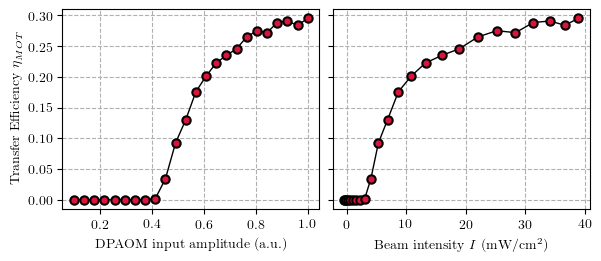

In [138]:
file_path = r"000016618-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_16618.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_16618.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, constrained_layout=True)

ax1.plot(x_data, y_data/10,'ko-')
ax1.set_xlabel('DPAOM input amplitude (a.u.)')
ax1.set_ylabel(r'Transfer Efficiency $\eta_{MOT}$')

# convert the DPAOM amplitude to beam intensity and plot as second x-axis
beam_power = sigmoid_func(x_data, *popt_sigmoid) * 20.73
beam_intensity = 2*beam_power/(np.pi*0.58**2)
ax2.plot(beam_intensity, y_data/10,'ko-')
ax2.set_xlabel(r'Beam intensity $I$ (mW/cm$^2$)')
# ax2.set_ylabel('Normalized horizontal pixel sum')

# plt.suptitle('Broadband red MOT for different DPAOM input amplitudes and beam intensities')

# plt.tight_layout()
plt.savefig('250427 Broadband red MOT for different DPAOM input amplitude and red beam intensities.pdf', dpi=300)